**Instructors**: Prof. Keith Chugg (chugg@usc.edu) & B. Keith Jenkins (bjenkins@usc.edu)

**Notebooks**: Written by Keith Chugg 

# Generating Correlated Data from Uncorrelated Sources (Coloring)

Random number generators on computers attempt to generate independent, identically distributed (iid) realizations from a given distribution.  It is useful to be able to translate these data into a desired correlation matrix.  This is called coloring.  The opposite process is call whitening.  This refers to the notion of white light, where all visible light frequencies are present at equal power and colored light, where the power is distributed non-uniformly across frequencies.  

We use a routine early in the semester to generate synthetic data.  This is reproduced below for reference.

In [3]:
############################################################
#### From nearest_means_classifier.ipynb
############################################################
def generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='normal', quiet_mode=True):
    """
    means: shape (2, 2), means[0] is the 2 x 1 mean vector for class 1 data generation
    lambdas: shape (2, 2), lambdas[0] are the 2 eigenvalues of the covariance matrix for generatinge data for class 1
    Ns: [N1, N2] the number of samples to be generated for each of teh two classes.
    distribution: in {normal, exponential, uniform} sets the distribution to generate data for both classes.
    quiet_mode: added this so that it won't print the details unless quiet_mode == False
    """
    N1 = Ns[0]
    N2 =  Ns[1]
    N = N1 + N2
    x = np.zeros((N, 2))
    assert distribution in {'normal', 'exponential', 'uniform'}, f'The {distribution} is not supported, only normal, exponential, uniform distributions are supported.'
    assert np.min(lambdas) > 0, f'lambda all have to be > 0 as they are variaces of the random vector projected onto the eigen-vectors.  You passed lambdas = {lambdas}'
    if distribution == 'normal':
        x[:N1] = np.random.normal(0, 1, (N1, 2))
        x[N1:] = np.random.normal(0, 1, (N2, 2))
    elif distribution == 'exponential':
        ## np.random.exponential(1) generates realizations from a unit variance, mean 1
        x[:N1] = np.random.exponential(1, (N1, 2)) - 1
        x[N1:] = np.random.exponential(1, (N2, 2)) - 1
    elif distribution == 'uniform':
        ## variance of uniform on (a,b) is (b-a)^2 / 12
        a = np.sqrt(3)
        x[:N1] = np.random.uniform(-a, a, (N1, 2))
        x[N1:] = np.random.uniform(-a, a, (N1, 2))

    def compute_coloring_matrix(theta, lams):
        E = np.asarray([ [np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)] ])
        Lambda_root = np.sqrt( np.asarray([ [lams[0], 0], [0, lams[1]] ]) )
        H = E @ Lambda_root
        K = H @ H.T
        return H, K

    H1, K1 = compute_coloring_matrix(thetas[0], lambdas[0])
    H2, K2 = compute_coloring_matrix(thetas[1], lambdas[1])

    x[:N1] = x[:N1] @ H1.T + means[0]
    x[N1:] = x[N1:] @ H2.T + means[1]

    labels = np.ones(N)
    labels[N1:] += 1

    sample_means = np.zeros((2,2))
    sample_means[0] = np.mean(x[:N1], axis=0)
    sample_means[1] = np.mean(x[N1:], axis=0)

    if not quiet_mode:
        print(f'Data generated under the {distribution} distribution')
        Ks = [K1, K2]
        Hs = [H1, H2]

        for i in range(2):
            print(f'The mean in the generating pdf for class {i + 1} is: {means[i]}')
            print(f'The sample mean for class {i + 1}  data is: {sample_means[i]}\n')

            print(f'The coloring matrix class {i + 1}  data is:\n {Hs[i]}')
            print(f'The covariance matrix class {i + 1}  data is:\n {Ks[i]}\n\n')

    return x, labels, sample_means


Let's use this to generate some data, start with the baseline: no axis rotation, equal power in both directions.

Data generated under the normal distribution
The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1  data is: [4.99309498 4.99371362]

The coloring matrix class 1  data is:
 [[1. 0.]
 [0. 1.]]
The covariance matrix class 1  data is:
 [[1. 0.]
 [0. 1.]]


The mean in the generating pdf for class 2 is: [-5 -5]
The sample mean for class 2  data is: [-4.99791755 -4.99686805]

The coloring matrix class 2  data is:
 [[1. 0.]
 [0. 1.]]
The covariance matrix class 2  data is:
 [[1. 0.]
 [0. 1.]]




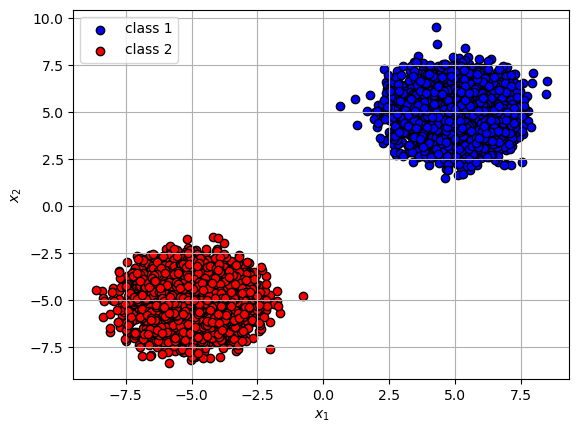

In [22]:
means = np.asarray( [ [5, 5], [-5, -5] ])
lambdas = np.asarray( [ [1, 1], [1, 1] ])  
thetas = np.asarray([ 0, 0 ])
Ns = np.asarray([5000, 5000])

x, labels, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='normal', quiet_mode=False)

plt.figure()
data_1 = x[:Ns[0]]
plt.scatter(data_1.T[0], data_1.T[1], edgecolors='k', color='b', label='class 1')
data_2 = x[Ns[0]:]
plt.scatter(data_2.T[0], data_2.T[1], edgecolors='k', color='r', label='class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(':')
plt.legend()
plt.show()

Data generated under the exponential distribution
The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1  data is: [4.9923874  4.97888516]

The coloring matrix class 1  data is:
 [[1. 0.]
 [0. 1.]]
The covariance matrix class 1  data is:
 [[1. 0.]
 [0. 1.]]


The mean in the generating pdf for class 2 is: [-5 -5]
The sample mean for class 2  data is: [-4.97711827 -5.01379431]

The coloring matrix class 2  data is:
 [[1. 0.]
 [0. 1.]]
The covariance matrix class 2  data is:
 [[1. 0.]
 [0. 1.]]




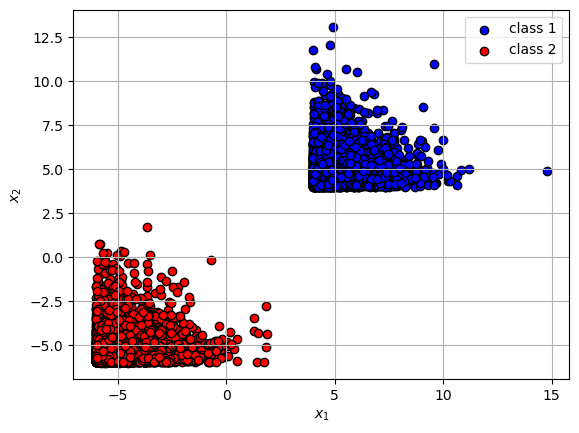

In [23]:
lambdas = np.asarray( [ [1, 1], [1, 1] ])  
thetas = np.asarray([ 0, 0 ])
Ns = np.asarray([5000, 5000])

x, labels, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='exponential', quiet_mode=False)

plt.figure()
data_1 = x[:Ns[0]]
plt.scatter(data_1.T[0], data_1.T[1], edgecolors='k', color='b', label='class 1')
data_2 = x[Ns[0]:]
plt.scatter(data_2.T[0], data_2.T[1], edgecolors='k', color='r', label='class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(':')
plt.legend()
plt.show()

Data generated under the uniform distribution
The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1  data is: [4.98152615 5.02180862]

The coloring matrix class 1  data is:
 [[1. 0.]
 [0. 1.]]
The covariance matrix class 1  data is:
 [[1. 0.]
 [0. 1.]]


The mean in the generating pdf for class 2 is: [-5 -5]
The sample mean for class 2  data is: [-5.00166844 -5.00002475]

The coloring matrix class 2  data is:
 [[1. 0.]
 [0. 1.]]
The covariance matrix class 2  data is:
 [[1. 0.]
 [0. 1.]]




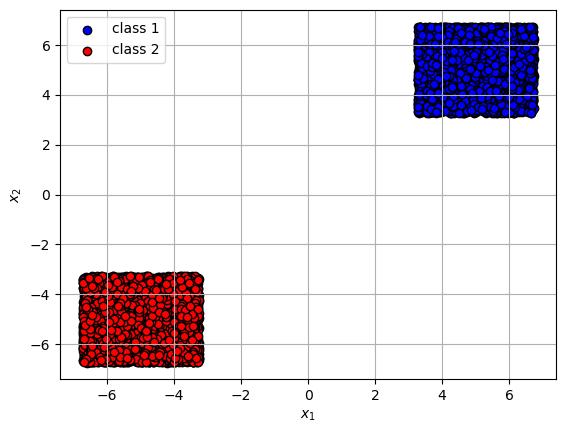

In [24]:
lambdas = np.asarray( [ [1, 1], [1, 1] ])  
thetas = np.asarray([ 0, 0 ])
Ns = np.asarray([5000, 5000])

x, labels, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='uniform', quiet_mode=False)

plt.figure()
data_1 = x[:Ns[0]]
plt.scatter(data_1.T[0], data_1.T[1], edgecolors='k', color='b', label='class 1')
data_2 = x[Ns[0]:]
plt.scatter(data_2.T[0], data_2.T[1], edgecolors='k', color='r', label='class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(':')
plt.legend()
plt.show()

Now, let's generate correlated data:

Data generated under the normal distribution
The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1  data is: [5.03748087 5.03434302]

The coloring matrix class 1  data is:
 [[ 1.58113883 -0.70710678]
 [ 1.58113883  0.70710678]]
The covariance matrix class 1  data is:
 [[3. 2.]
 [2. 3.]]


The mean in the generating pdf for class 2 is: [-5 -5]
The sample mean for class 2  data is: [-5.02209769 -4.99756821]

The coloring matrix class 2  data is:
 [[ 1.58113883  0.70710678]
 [-1.58113883  0.70710678]]
The covariance matrix class 2  data is:
 [[ 3. -2.]
 [-2.  3.]]




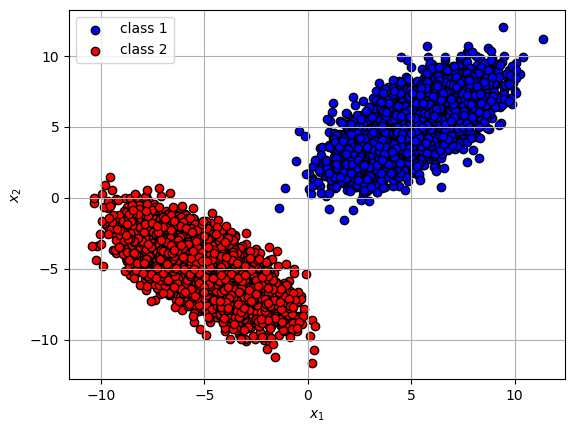

In [25]:
lambdas = np.asarray( [ [5, 1], [5, 1] ])  
thetas = np.asarray([ np.pi / 4, -np.pi / 4 ])
Ns = np.asarray([5000, 5000])

x, labels, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, quiet_mode=False)

plt.figure()
data_1 = x[:Ns[0]]
plt.scatter(data_1.T[0], data_1.T[1], edgecolors='k', color='b', label='class 1')
data_2 = x[Ns[0]:]
plt.scatter(data_2.T[0], data_2.T[1], edgecolors='k', color='r', label='class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(':')
plt.legend()
plt.show()

Data generated under the exponential distribution
The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1  data is: [4.97898871 4.98276701]

The coloring matrix class 1  data is:
 [[ 1.58113883 -0.70710678]
 [ 1.58113883  0.70710678]]
The covariance matrix class 1  data is:
 [[3. 2.]
 [2. 3.]]


The mean in the generating pdf for class 2 is: [-5 -5]
The sample mean for class 2  data is: [-4.99918201 -4.98824709]

The coloring matrix class 2  data is:
 [[ 1.58113883  0.70710678]
 [-1.58113883  0.70710678]]
The covariance matrix class 2  data is:
 [[ 3. -2.]
 [-2.  3.]]




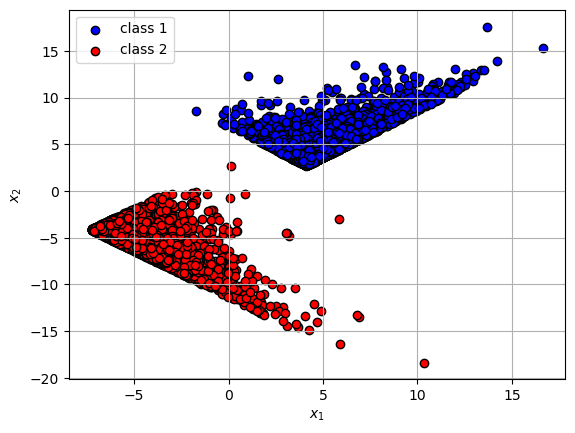

In [26]:
lambdas = np.asarray( [ [5, 1], [5, 1] ])  
thetas = np.asarray([ np.pi / 4, -np.pi / 4 ])
Ns = np.asarray([5000, 5000])

x, labels, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='exponential', quiet_mode=False)

plt.figure()
data_1 = x[:Ns[0]]
plt.scatter(data_1.T[0], data_1.T[1], edgecolors='k', color='b', label='class 1')
data_2 = x[Ns[0]:]
plt.scatter(data_2.T[0], data_2.T[1], edgecolors='k', color='r', label='class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(':')
plt.legend()
plt.show()

Data generated under the uniform distribution
The mean in the generating pdf for class 1 is: [5 5]
The sample mean for class 1  data is: [4.94410615 4.92097391]

The coloring matrix class 1  data is:
 [[ 1.58113883 -0.70710678]
 [ 1.58113883  0.70710678]]
The covariance matrix class 1  data is:
 [[3. 2.]
 [2. 3.]]


The mean in the generating pdf for class 2 is: [-5 -5]
The sample mean for class 2  data is: [-4.99744417 -5.011703  ]

The coloring matrix class 2  data is:
 [[ 1.58113883  0.70710678]
 [-1.58113883  0.70710678]]
The covariance matrix class 2  data is:
 [[ 3. -2.]
 [-2.  3.]]




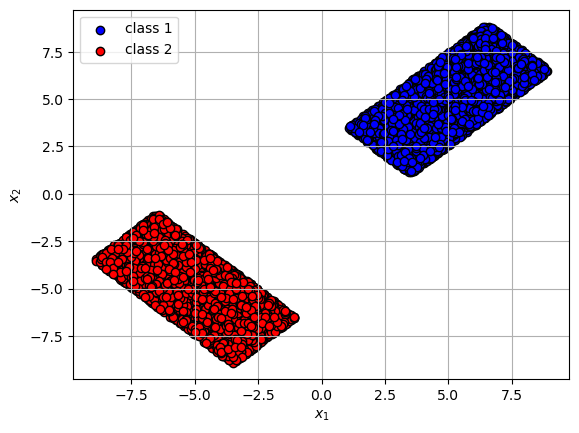

In [27]:
lambdas = np.asarray( [ [5, 1], [5, 1] ])  
thetas = np.asarray([ np.pi / 4, -np.pi / 4 ])
Ns = np.asarray([5000, 5000])

x, labels, sample_means = generate_colored_nongaussian_data(means, lambdas, thetas, Ns, distribution='uniform', quiet_mode=False)

plt.figure()
data_1 = x[:Ns[0]]
plt.scatter(data_1.T[0], data_1.T[1], edgecolors='k', color='b', label='class 1')
data_2 = x[Ns[0]:]
plt.scatter(data_2.T[0], data_2.T[1], edgecolors='k', color='r', label='class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(':')
plt.legend()
plt.show()